# 1. Import Libraries:

In [1]:
# Used for analysis data: 
import pandas as pd
import numpy as np

# Used for NLP:
import spacy
#used for view information from spacy document
from spacy import displacy 
#this is natural lanugage toolkit for text data preprocessing
import nltk
from nltk.corpus import stopwords

# Visualisation tool:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Utility:
import warnings
warnings.filterwarnings("ignore")


# ANALYSIS USING SPACY
!python3 -m spacy download en_core_web_md
nlp_md = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 39.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 2. Load Dataset:

In [2]:
df = pd.read_csv("/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv")


# 3. Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

## 3.1 Category Distribution:

In [5]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


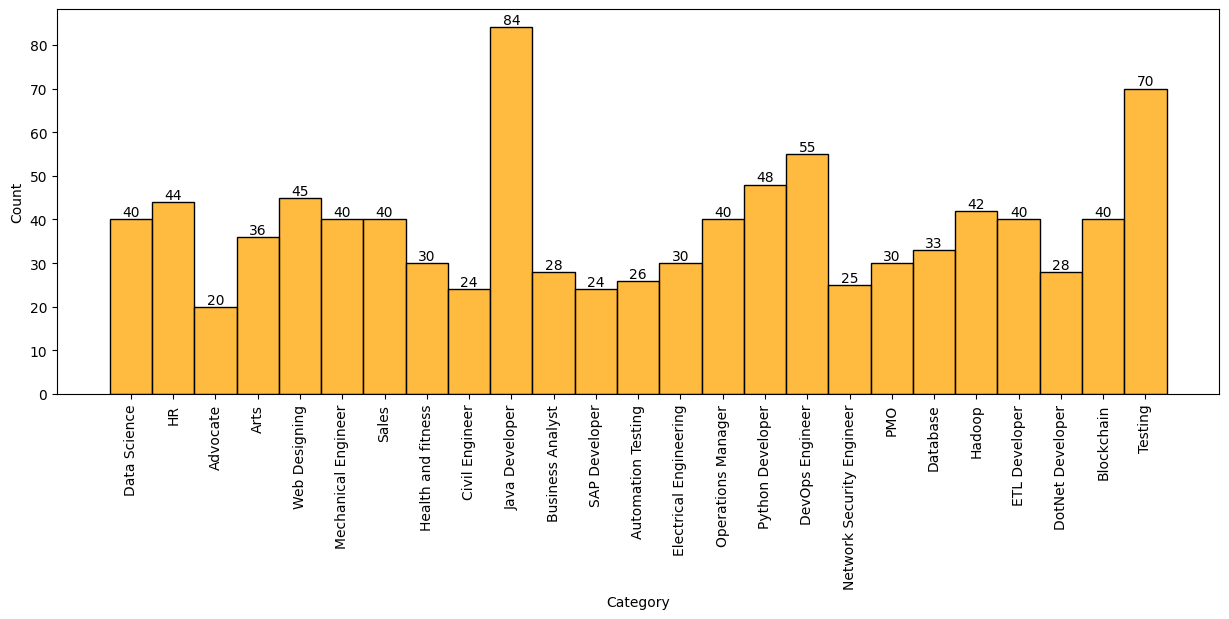

In [6]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, x='Category', stat='count', color='orange')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), 
            int(i.get_height()), 
            ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [7]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
labels



array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
noOfCategories = df["Category"].nunique()
noOfCategories

25

## 3.2 Pie Chart Distribution:

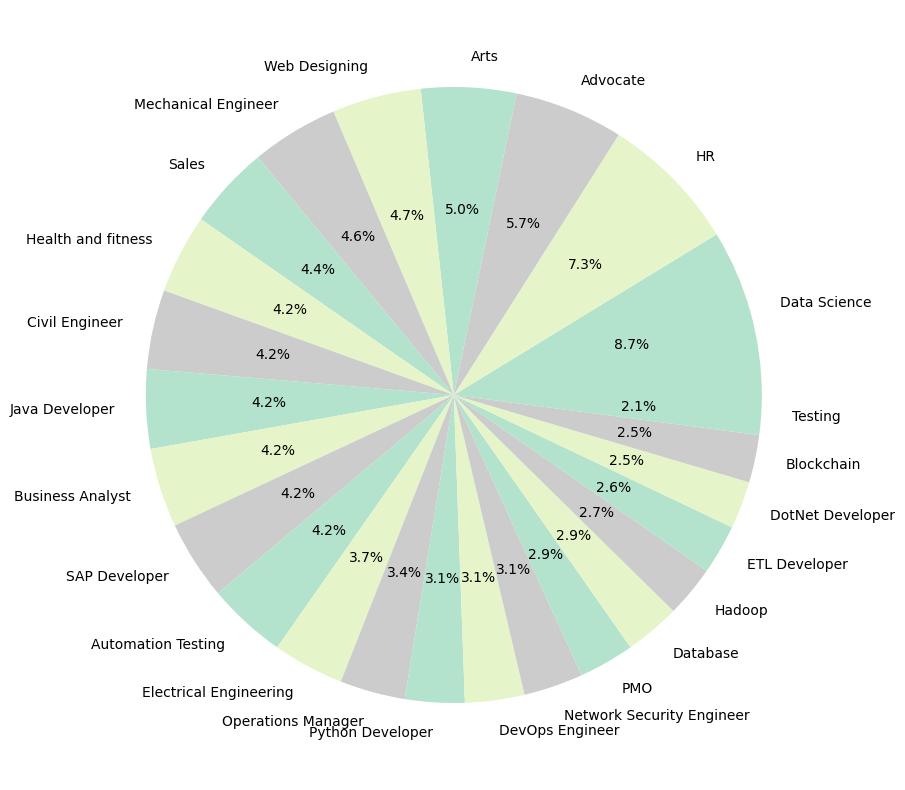

In [9]:
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Pastel2(np.linspace(0,1,3)))
plt.show()

# 4. Data Preprocessing

## 4.1 Text Preprocessing
   This step cleans all the URLs, special characters, emails/mention and stop words.

In [10]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function for cleaning text in the Resume dataset:

In [11]:
import re  #import regular expression libraries 
# Helper function for cleaning text in the resume
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Remove carriage returns and line feeds
    text = text.replace('\r', '').replace('\n', ' ')
    
    # Remove non-ASCII characters
    text = text.encode('ascii', errors='ignore').decode('utf-8')
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove emails
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)
    # Remove @ mentions
    text = re.sub(r'@\S+', '', text)
    # Remove special characters (keep alphanumeric and spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Collapse multiple spaces into one
    text = re.sub(r'\s+', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text



In [12]:
print("Sample Original Resume:\n")
df["Resume"][0]

Sample Original Resume:



'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [13]:
#Apply clean text function to the actual dataset
df['modified_resume'] = df['Resume'].apply(lambda x : clean_text(x))

In [14]:
print("Sample Modified Resume:\n")
df['modified_resume'][0]

Sample Modified Resume:



'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run anal

### Visualization of Word Frequency in Resumes

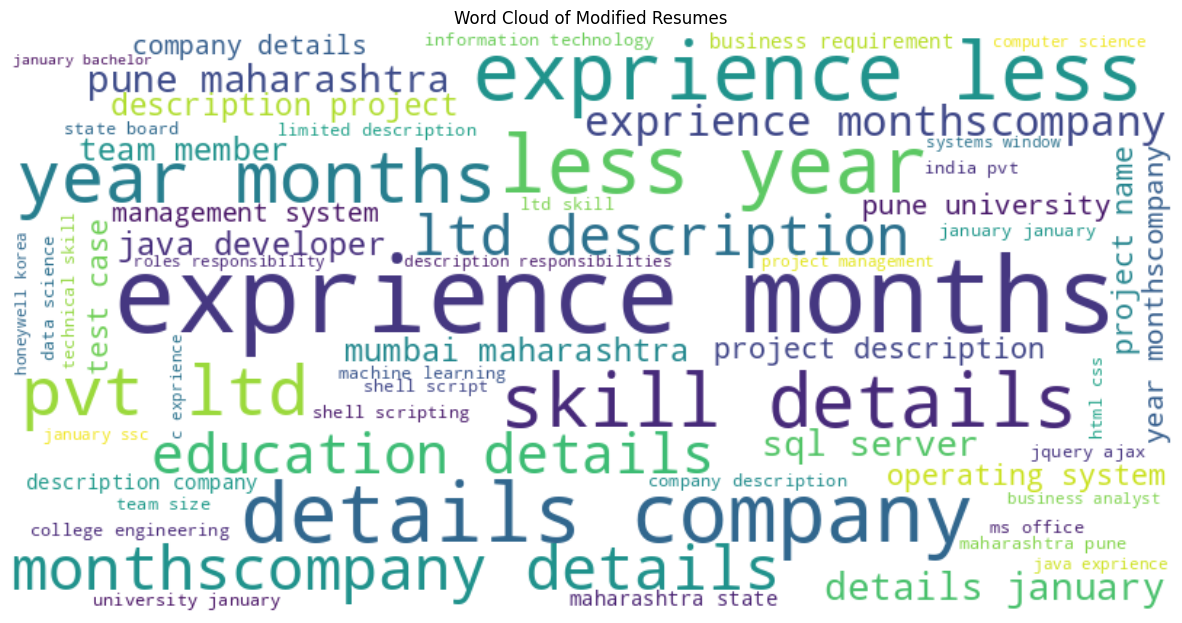

In [15]:
from wordcloud import WordCloud

# Combine all cleaned resumes into a single string
text = ' '.join(df['modified_resume'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(text)

# showing all the most appearance words in the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Modified Resumes')
plt.show()

The word cloud shows that the modified resumes emphasize Experience, Education Details, Company, and Months, indicating a focus on work history and duration. Key Skills like "Ms Office," "Java," "HTML," "CSS," and "Technical skill" etc. are prominent.

# 5.Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Prepare data
#word feature
Resume_content = df['modified_resume'].values  
Target = df['Category'].values

## 5.1 Spliting data into training and test set:

In [17]:
# Train-test split (e.g., 80% train set, 20% test set)
X_train, X_test, y_train, y_test = train_test_split(Resume_content, 
                                                    Target, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True, 
                                                    stratify = Target)



## 5.2 Feature extraction: (TF-IDF)

In [18]:
#Using TF-IDF metho to convert each modified context into vectors in resume

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, stop_words='english', ngram_range=(1, 1)) 

# Fit only on training data
X_train = tfidf.fit_transform(X_train)
# Transform test data using the same vectorizer
X_test = tfidf.transform(X_test)
                     

In [19]:
print(X_train.shape)
print(X_test.shape)

(769, 7849)
(193, 7849)


# 6. Model Training

## 6.1 Building the model:

In [20]:
#used for fitting one classifier per class
from sklearn.multiclass import OneVsRestClassifier  
from sklearn.model_selection import train_test_split
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#evaluation methods:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score
from sklearn.metrics import recall_score, f1_score


# Define base models wrapped with OneVsRestClassifier
#Using OneVsRestClassifier allow binary classifer for multi class classification.
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear')),
    'SVC': OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    'K-Nearest Neighbors': OneVsRestClassifier(KNeighborsClassifier()),
    'XGBoost': OneVsRestClassifier(XGBClassifier(use_label_encoder=False,
                                                 eval_metric='mlogloss'))
}



# 7. Model training and Testing

Training Logistic Regression...

 Classification Report for Logistic Regression:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.00      1.00 

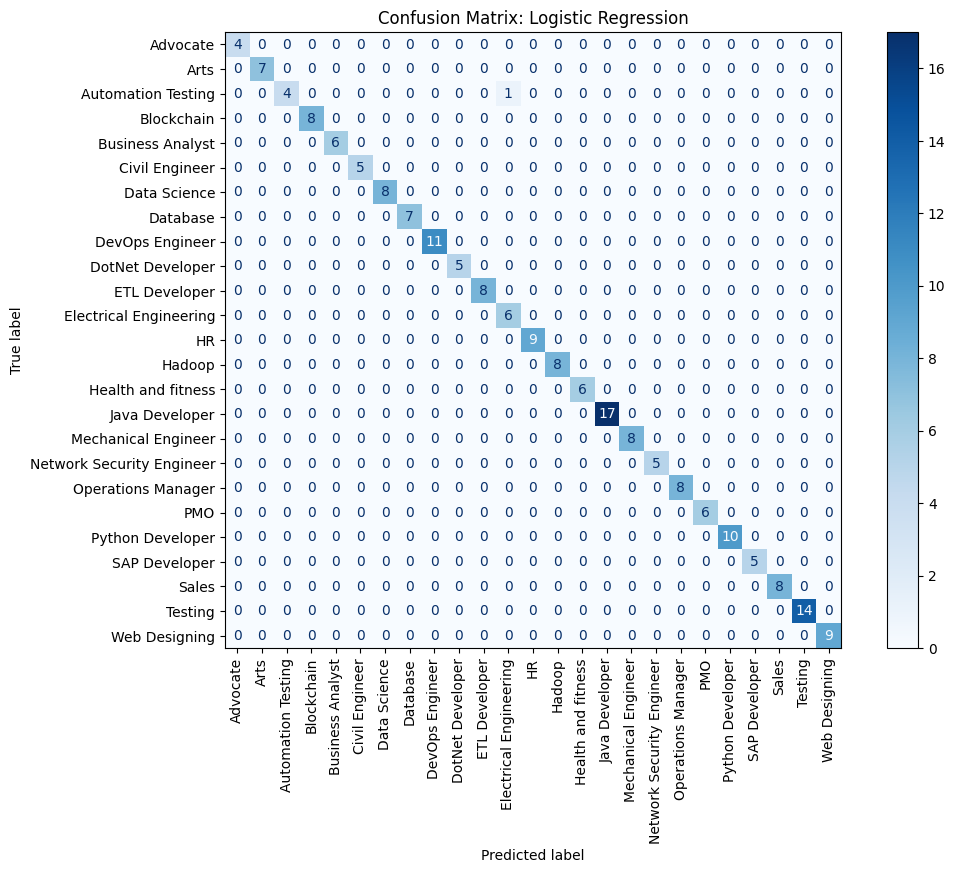

Training SVC...

 Classification Report for SVC:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
            

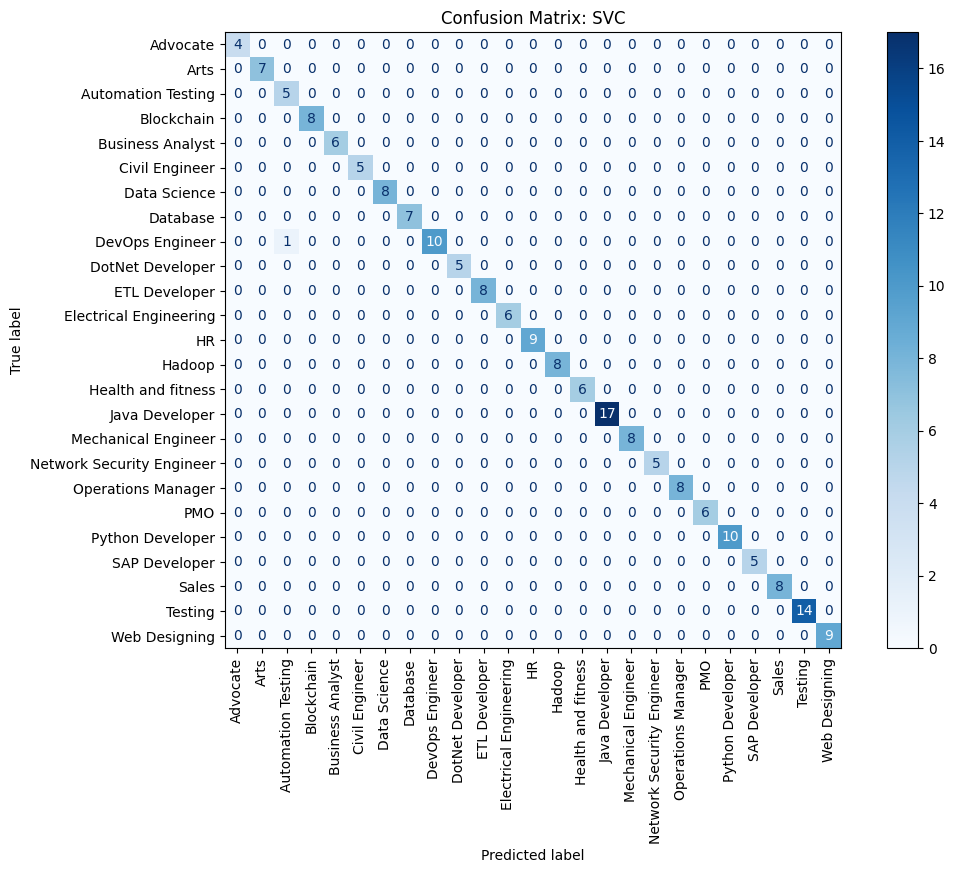

Training K-Nearest Neighbors...

 Classification Report for K-Nearest Neighbors:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       0.86      1.00      0.92         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       0.89      1.00      0.94         8
                 Database       1.00      0.86      0.92         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.86      1.00      0.92         6
                       HR       1.00      1.00 

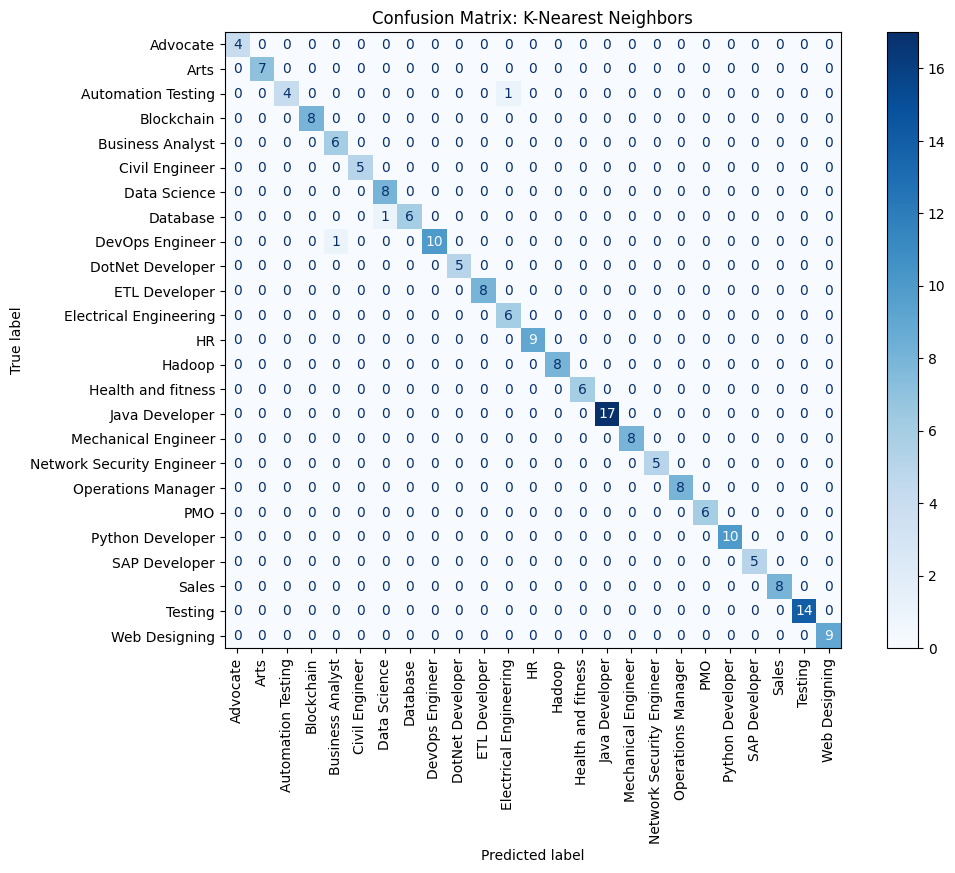

Training XGBoost...

 Classification Report for XGBoost:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
    

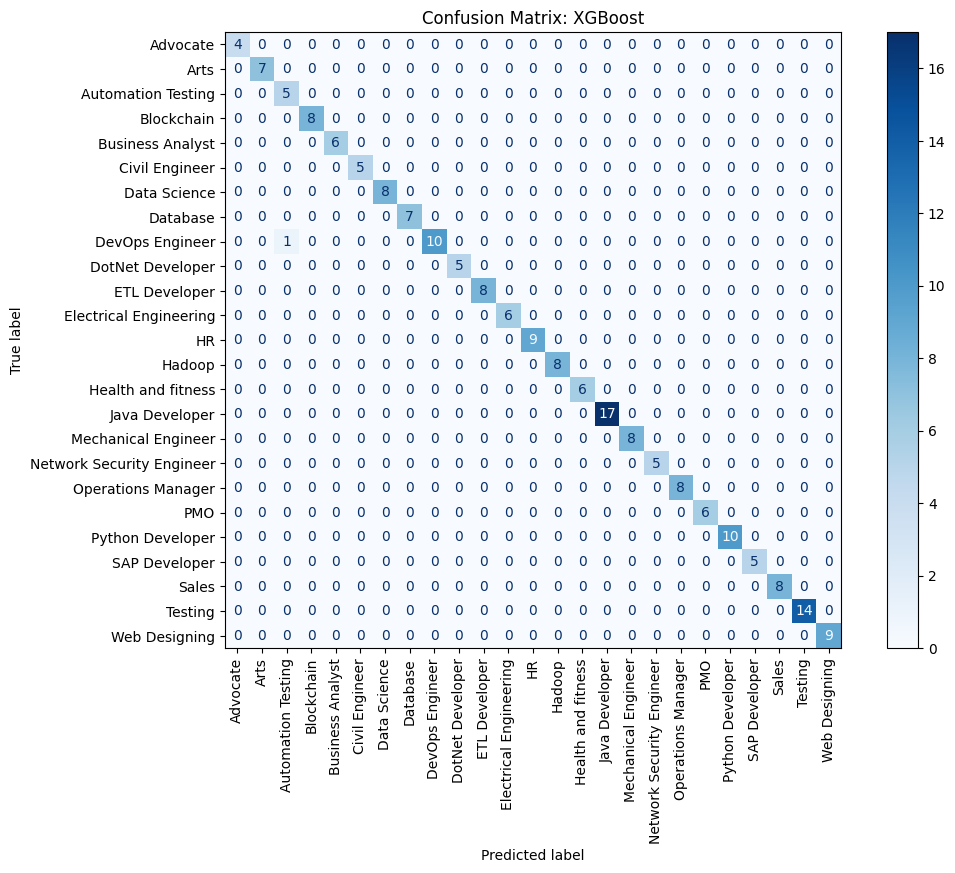

In [21]:
results = []

for name, model in models.items():
    print("=" * 70)
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"\n Classification Report for {name}:")
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    fig, ax = plt.subplots(figsize=(12, 8))
    disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

## 7.1 Models Accuracy Visulisation

In [22]:
# Accuracy Table for all the models:
results_df = pd.DataFrame(results)
print("\n Model Performance Summary:")
print("=" * 80)
display(results_df.sort_values(by='Test Accuracy', ascending=False))



 Model Performance Summary:


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.998700,0.994819,0.995559,0.994819,0.994730
1,SVC,1.000000,0.994819,0.995682,0.994819,0.994931
3,XGBoost,1.000000,0.994819,0.995682,0.994819,0.994931
2,K-Nearest Neighbors,0.989597,0.984456,0.986512,0.984456,0.984396


All four models—SVC, XGBoost, Logistic Regression, and K-Nearest Neighbors—performed very well, with test accuracies above 98%. SVC and XGBoost achieved the highest accuracy (~99.5%) and showed minimal overfitting. Precision, recall, and F1 scores were consistently strong across models.

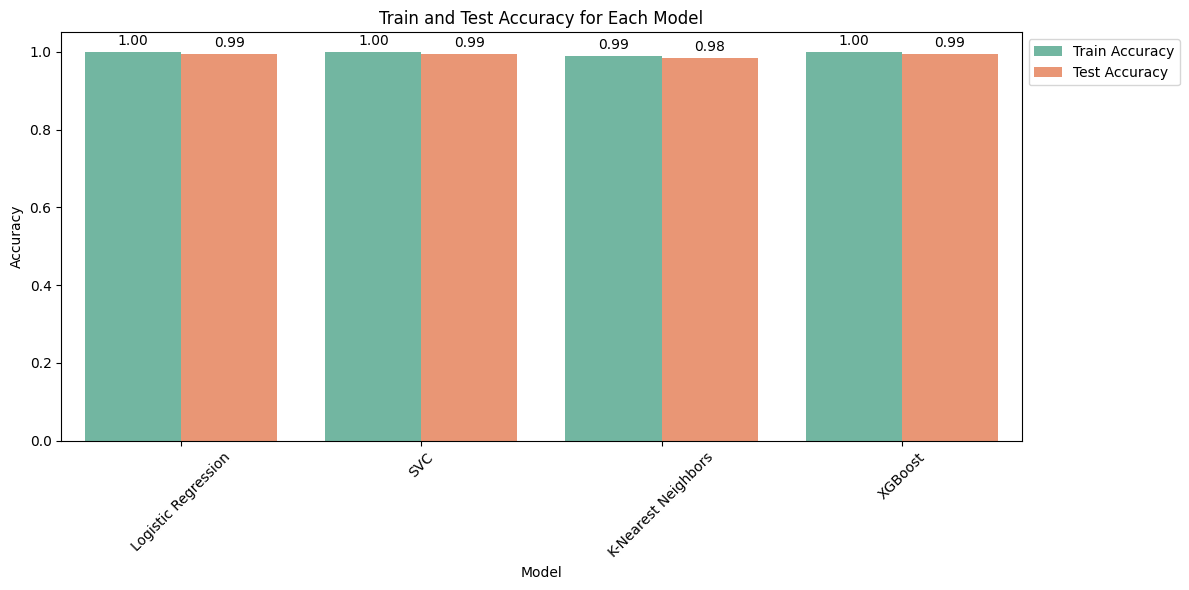

In [23]:
# Train and Test Accuracy Bar Plot
accuracy_df = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'], 
                              var_name='Accuracy Type', value_name='Accuracy')

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=accuracy_df, palette='Set2')

# Annotate bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f"{height:.2f}", 
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom',
                      fontsize=10,
                      xytext=(0, 3),
                      textcoords='offset points')

plt.title("Train and Test Accuracy for Each Model")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



# 8. Save the model

In [24]:
import joblib

best_model_name = results_df.sort_values(by='Test Accuracy', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
joblib.dump(best_model, "best_resume_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print(f"\n Best model: {best_model_name} saved as 'best_resume_classifier.pkl'")
print("TF-IDF Vectorizer saved as 'tfidf_vectorizer.pkl'")



 Best model: Logistic Regression saved as 'best_resume_classifier.pkl'
TF-IDF Vectorizer saved as 'tfidf_vectorizer.pkl'


# 9. sample prediction

In [25]:
import random

# Load the model and vectorizer
best_model = joblib.load("best_resume_classifier.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

# Pick a random row
random_index = random.randint(0, len(df)-1)
random_resume = df.iloc[random_index]['Resume']
actual_category = df.iloc[random_index]['Category']

# Clean using your function
cleaned_resume = clean_text(random_resume)

# Transform and predict
resume_vector = tfidf.transform([cleaned_resume])
predicted_category = best_model.predict(resume_vector)[0]

# Show results
print(f"Actual Category: {actual_category}")
print(f"Predicted Category: {predicted_category}")


Actual Category: Data Science
Predicted Category: Data Science
